<a href="https://colab.research.google.com/github/andrillion/travel-site/blob/master/Kopia_av_fpl_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimal fantasy football squad
## Content

1. Webscraping
2. Data cleaning
3. Data exploration
4. Optimiziation
5. Plot optimal team
6. Points vs cost regression

## 1.Webscraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

# URL of the Fantasy Premier League site
url = 'https://fplform.com/fpl-predicted-points'

try:
    # Send a request to the website
    response = requests.get(url)
    print("Request sent, status code:", response.status_code)
except Exception as e:
    print("An error occurred while making the request:", e)
    exit()

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to retrieve data: Status code {response.status_code}")
    exit()

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Print a part of soup to check if the request was successful
print("Part of the HTML content:")
print(soup.prettify()[:500])  # Prints first 500 characters of the HTML

# Find the table with the ID 'players'
players_table = soup.find('table', id='players')

# Check if the table is found
if not players_table:
    print("Players table not found")
    exit()
else:
    print("Players table found")


Request sent, status code: 200
Part of the HTML content:
<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   FPL Player Predicted Points and Value | FPL Form
  </title>
  <meta content="Interactive table of predicted points and value for Fantasy Premier League players. Choose the best players for your FPL team." name="description"/>
  <meta content="FPL Form Fantasy Premier League FPL predicted points value football soccer gameweek expected predictions xG xA" name="keywords"/>
  <!-- user-scalable=no is to make fixedHeader work correctly on Android 
Players table found


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Fantasy Premier League site
url = 'https://fplform.com/fpl-predicted-points'

# Send a request to the website
response = requests.get(url)

# Check if the request was successful
if response.status_code != 200:
    print(f"Failed to retrieve data: Status code {response.status_code}")
    exit()

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table with the ID 'players'
players_table = soup.find('table', id='players')

# Check if the table is found
if not players_table:
    print("Players table not found")
    exit()

# Convert the table to a DataFrame
df = pd.read_html(str(players_table))[0]

# Now you can manipulate the DataFrame as needed, for example:
# Rename columns, handle missing values, convert data types, etc.
# df.columns = ['Name', 'Position', 'Team', 'Cost', 'Points'] # Example to rename columns

# Save the DataFrame to a CSV file
df.to_csv('fpl_players_data.csv', index=False)

print("Data scraping and saving completed successfully.")


Data scraping and saving completed successfully.


# 2. Data cleaning

In [ ]:
import os
print(os.getcwd())



/Users/andreas


In [ ]:
import pandas as pd

# Full file path
file_path = '/Users/andreas/fpl_players_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head(50)


,✔Click to move selected players to the top,Player,forInfoClick for player info popup,Team,PosPosition,CostPlayer's current price,MeritHow good the player is in terms of likelihood to score FPL points,FormOver/under-performance over the last 4 gameweeks compared to predicted points,Prob. ofAppear-ingProbability that the player will play at all in the next match,PPGW37,...,ValNext2,PPRest OfSeasonPredicted FPL points for the rest of the season,ValueRest OfSeasonPlayer's value for the rest of the season (predicted points per million pounds excess cost),PointsSo Far,OfficialChancePlayer's official chance of playing the next match,OfficialAvailability,SelectedBy %Percentage of managers owning this player,TransfersIn GWNumber of transfers in since the last transfer deadline,TransfersOut GWNumber of transfers out since the last transfer deadline,News
0,NaN,Haaland,NaN,MCI,FWD,14.2,6.09,0.64,0.88,11.9,...,1.71,18,1.7,179,100,Available,65.1,19505,683,NaN
1,NaN,Palmer,NaN,CHE,MID,6.2,5.66,2.98,0.85,11.7,...,6.82,18,6.8,216,100,Available,49.4,5394,376,NaN
2,NaN,B.Fernandes,NaN,MUN,MID,8.5,5.33,4,0.64,11.4,...,3.34,17,3.3,161,75,Doubtful,17.6,5259,5376,Knock - 75% chance of playing
3,NaN,Son,NaN,TOT,MID,9.9,4.56,-0.15,0.94,9.3,...,2.25,14,2.2,195,100,Available,31.7,10439,3269,NaN
4,NaN,Isak,NaN,NEW,FWD,8.3,4.93,2.27,0.94,9.2,...,2.87,14,2.9,147,100,Available,38.6,18949,646,NaN
5,NaN,Foden,NaN,MCI,MID,8.4,4.49,0.67,0.64,9.0,...,2.85,14,2.8,199,100,Available,39.7,10983,1705,NaN
6,NaN,Gross,NaN,BHA,MID,6.1,4.31,-1.47,0.94,8.3,...,5.03,13,5,145,100,Available,4.1,1194,788,NaN
7,NaN,J.Alvarez,NaN,MCI,FWD,6.4,4,-0.65,0.9,8.0,...,4.25,12,4.3,147,100,Available,16.5,2363,3297,NaN
8,NaN,De Bruyne,NaN,MCI,MID,10.5,3.76,1.43,0.87,7.5,...,1.67,12,1.7,82,100,Available,18.6,12823,758,NaN
9,NaN,Rashford,NaN,MUN,MID,8.4,3.52,0.28,0.06,7.2,...,2.19,11,2.2,106,25,Doubtful,9.7,12,748,Knock - 25% chance of playing


In [ ]:
# Display the column names of the DataFrame
print(df.columns)


Index(['✔Click to move selected players to the top', 'Player',
       'forInfoClick for player info popup', 'Team', 'PosPosition',
       'CostPlayer's current price',
       'MeritHow good the player is in terms of likelihood to score FPL points',
       'FormOver/under-performance over the last 4 gameweeks compared to predicted points',
       'Prob. ofAppear-ingProbability that the player will play at all in the next match',
       'PPGW37', 'ValGW37', 'PPGW38', 'PPNext2', 'ValNext2',
       'PPRest OfSeasonPredicted FPL points for the rest of the season',
       'ValueRest OfSeasonPlayer's value for the rest of the season (predicted points per million pounds excess cost)',
       'PointsSo Far',
       'OfficialChancePlayer's official chance of playing the next match',
       'OfficialAvailability',
       'SelectedBy %Percentage of managers owning this player',
       'TransfersIn GWNumber of transfers in since the last transfer deadline',
       'TransfersOut GWNumber of transfer

In [ ]:
# Specify the columns you want to keep
columns_to_keep = ["Player", "Team", "PosPosition", "CostPlayer's current price", "PointsSo Far"]  # Replace with your actual column names

# Select these columns
df = df[columns_to_keep]

# Now df will only contain the columns specified in columns_to_keep
print(df.head())

        Player Team PosPosition  CostPlayer's current price PointsSo Far
0      Haaland  MCI         FWD                        14.2          179
1       Palmer  CHE         MID                         6.2          216
2  B.Fernandes  MUN         MID                         8.5          161
3          Son  TOT         MID                         9.9          195
4         Isak  NEW         FWD                         8.3          147


In [ ]:
# List of player names to remove
players_to_remove = ['Alexander-Arnold', 'Olise']  # Replace with actual names

# Filter out rows where 'PLAYER' is in the list of players to remove
df = df[~df['Player'].isin(players_to_remove)]

In [ ]:
# Rename columns
df = df.rename(columns={
    'Player' : 'PLAYER',
    'Team' : 'TEAM',
    'PosPosition': 'POSITION',
    'CostPlayer\'s current price': 'PRICE',
    'PointsSo Far': 'POINTS'
})

# Specify the columns you want to keep
columns_to_keep = ['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS']

# Select these columns
df = df[columns_to_keep]

# Display the first few rows of the modified DataFrame
df.head()


,PLAYER,TEAM,POSITION,PRICE,POINTS
0,Haaland,MCI,FWD,14.2,179
1,Palmer,CHE,MID,6.2,216
2,B.Fernandes,MUN,MID,8.5,161
3,Son,TOT,MID,9.9,195
4,Isak,NEW,FWD,8.3,147


In [ ]:
type('POINTS')

str

In [ ]:
df['POINTS'] = pd.to_numeric(df['POINTS'], errors='coerce')
df.head(20)

,PLAYER,TEAM,POSITION,PRICE,POINTS
0,Haaland,MCI,FWD,14.2,179.0
1,Palmer,CHE,MID,6.2,216.0
2,B.Fernandes,MUN,MID,8.5,161.0
3,Son,TOT,MID,9.9,195.0
4,Isak,NEW,FWD,8.3,147.0
5,Foden,MCI,MID,8.4,199.0
6,Gross,BHA,MID,6.1,145.0
7,J.Alvarez,MCI,FWD,6.4,147.0
8,De Bruyne,MCI,MID,10.5,82.0
9,Rashford,MUN,MID,8.4,106.0


In [ ]:
df = df[df['POINTS'] > 30]
df = df.reset_index(drop=True)


In [ ]:
# Convert 'Points' and 'Cost' columns to numeric type (float)
df['POINTS'] = pd.to_numeric(df['POINTS'], errors='coerce')
df['PRICE'] = pd.to_numeric(df['PRICE'], errors='coerce')

# Now calculate 'Points per Cost'
df['POINTS_MILLION'] = df['POINTS'] / df['PRICE']

# Display the first few rows of the DataFrame to see the new column
df.head()


,PLAYER,TEAM,POSITION,PRICE,POINTS,POINTS_MILLION
0,Haaland,MCI,FWD,14.2,179.0,12.605634
1,Palmer,CHE,MID,6.2,216.0,34.838710
2,B.Fernandes,MUN,MID,8.5,161.0,18.941176
3,Son,TOT,MID,9.9,195.0,19.696970
4,Isak,NEW,FWD,8.3,147.0,17.710843


In [ ]:
df['POINTS_MATCH'] = (df['POINTS'] / 18).round(2)

In [ ]:
print(df.columns)


Index(['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION',
       'POINTS_MATCH'],
      dtype='object')


In [ ]:
# Filter out players with less than 20 points in place
#df = df[df['POINTS'] >= 10]

# Display the first few rows of the modified DataFrame
#df.head()


# 3. Data exploration

In [ ]:
# Group the data by position and calculate the average points per position
average_points_by_position = df.groupby('POSITION')['POINTS'].mean().reset_index()

# Rename the columns for clarity
average_points_by_position.columns = ['POSITION', 'Average_Points']

# Sort the positions by average points in descending order
sorted_positions = average_points_by_position.sort_values(by='Average_Points', ascending=False)

# Display the result
print(sorted_positions)


  POSITION  Average_Points
1      FWD       86.133333
3      MID       82.912162
2       GK       82.800000
0      DEF       66.800000


In [ ]:
# Group the data by position and calculate the average points per position
average_points_million_by_position = df.groupby('POSITION')['POINTS_MILLION'].mean().reset_index()

# Rename the columns for clarity
average_points_million_by_position.columns = ['POSITION', 'Average_Points_MILLION']

# Sort the positions by average points in descending order
sorted_positions = average_points_million_by_position.sort_values(by='Average_Points_MILLION', ascending=False)

# Display the result
print(sorted_positions)

  POSITION  Average_Points_MILLION
2       GK               17.450598
3      MID               14.606534
1      FWD               14.554718
0      DEF               14.272676


In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# data = {'NAME': [...], 'TEAM': [...], 'POSITION': [...], 'PRICE': [...], 'POINTS_MILLION': [...]}
# df = pd.DataFrame(data)

# Group the data by position
position_groups = df.groupby('POSITION')

# Define a function to sort each group by POINTS_MILLION in descending order and return the top 10 players
def top_10_by_points_million(group):
    # Sort by POINTS_MILLION in descending order and return the top 10 players
    sorted_group = group.sort_values(by='POINTS', ascending=False).head(20)
    return sorted_group[['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS']]  # Exclude columns you don't want to print

# Apply the function to each group and concatenate the results
top_10_players_by_position = position_groups.apply(top_10_by_points_million)

# Reset the index of top_10_players_by_position
top_10_players_by_position = top_10_players_by_position.reset_index(drop=True)

# Define the order of positions
position_order = ['GK', 'DEF', 'MID', 'FWD']

# Print a blank line between each position group in the specified order
for position in position_order:
    group = top_10_players_by_position[top_10_players_by_position['POSITION'] == position]
    print(f"\n{position}:\n")
    print(group.to_string(index=False))



GK:

      PLAYER TEAM POSITION  PRICE  POINTS
    Pickford  EVE       GK    4.8   144.0
        Leno  FUL       GK    4.8   124.0
        Raya  ARS       GK    5.2   122.0
       Onana  MUN       GK    5.0   119.0
    Martinez  AVL       GK    5.3   115.0
        Neto  BOU       GK    4.7   108.0
      Areola  WHU       GK    4.2   107.0
     Flekken  BRE       GK    4.7   105.0
     José Sá  WOL       GK    5.0   101.0
     Vicario  TOT       GK    5.3   100.0
    A.Becker  LIV       GK    5.7    98.0
  Ederson M.  MCI       GK    5.5    97.0
    Kaminski  LUT       GK    4.5    84.0
    Trafford  BUR       GK    4.4    70.0
   Johnstone  CRY       GK    4.3    68.0
    Dubravka  NEW       GK    4.3    67.0
 Foderingham  SHU       GK    4.4    62.0
    Petrović  CHE       GK    4.6    59.0
     Sanchez  CHE       GK    4.5    59.0
        Pope  NEW       GK    5.3    56.0

DEF:

      PLAYER TEAM POSITION  PRICE  POINTS
       White  ARS      DEF    6.1   168.0
      Saliba  ARS    

In [ ]:
import pandas as pd

# Sample DataFrame (replace this with your actual DataFrame)
# data = {'NAME': [...], 'TEAM': [...], 'POSITION': [...], 'PRICE': [...], 'POINTS_MILLION': [...]}
# df = pd.DataFrame(data)

# Group the data by position
position_groups = df.groupby('POSITION')

# Define a function to sort each group by POINTS_MILLION in descending order and return the top 10 players
def top_10_by_points_million(group):
    # Sort by POINTS_MILLION in descending order and return the top 10 players
    sorted_group = group.sort_values(by='POINTS_MILLION', ascending=False)
    return sorted_group[['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS_MILLION']].head(15)  # Exclude columns you don't want to print

# Apply the function to each group and concatenate the results
top_10_players_by_position = position_groups.apply(top_10_by_points_million)

# Reset the index of top_10_players_by_position
top_10_players_by_position = top_10_players_by_position.reset_index(drop=True)

# Define the order of positions
position_order = ['GK', 'DEF', 'MID', 'FWD']

# Print a blank line between each position group in the specified order
for position in position_order:
    group = top_10_players_by_position[top_10_players_by_position['POSITION'] == position]
    print(f"\n{position}:\n")
    print(group.to_string(index=False))




GK:

     PLAYER TEAM POSITION  PRICE  POINTS_MILLION
   Pickford  EVE       GK    4.8       30.000000
       Leno  FUL       GK    4.8       25.833333
     Areola  WHU       GK    4.2       25.476190
      Onana  MUN       GK    5.0       23.800000
       Raya  ARS       GK    5.2       23.461538
       Neto  BOU       GK    4.7       22.978723
    Flekken  BRE       GK    4.7       22.340426
   Martinez  AVL       GK    5.3       21.698113
    José Sá  WOL       GK    5.0       20.200000
    Vicario  TOT       GK    5.3       18.867925
   Kaminski  LUT       GK    4.5       18.666667
 Ederson M.  MCI       GK    5.5       17.636364
   A.Becker  LIV       GK    5.7       17.192982
   Trafford  BUR       GK    4.4       15.909091
  Johnstone  CRY       GK    4.3       15.813953

DEF:

      PLAYER TEAM POSITION  PRICE  POINTS_MILLION
       White  ARS      DEF    6.1       27.540984
 Branthwaite  EVE      DEF    4.4       26.590909
      Saliba  ARS      DEF    5.9       24.915254
   

In [ ]:
print(df.columns)

Index(['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION',
       'POINTS_MATCH'],
      dtype='object')


# 4. Optimization

In [ ]:
from pyomo.environ import *

# Create a Concrete Model
model = ConcreteModel()

# Assume 'df' is your DataFrame with the necessary player data

# Define the set of players
players = range(len(df))

# Define binary decision variables for each player and captain selection
model.Selected = Var(players, within=Binary)
model.Captain = Var(players, within=Binary)

# Define the objective function to maximize total points, including captain's double points
def objective_rule(model):
    return sum(model.Selected[i] * df.iloc[i]['POINTS'] for i in players) + \
           sum(model.Captain[i] * df.iloc[i]['POINTS'] for i in players)
model.obj = Objective(rule=objective_rule, sense=maximize)

# Define the budget constraint for total budget
total_budget = 105  # Example total budget
model.total_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.iloc[i]['PRICE'] for i in players) <= total_budget)

# Define the position constraints
position_constraints = {'GK': 2, 'DEF': 5, 'MID': 5, 'FWD': 3}
for position, num_players in position_constraints.items():
    model.add_component(
        f"{position}_constraint",
        Constraint(expr=sum(model.Selected[i] for i in players if df.iloc[i]['POSITION'] == position) == num_players)
    )

# Define a constraint to limit the total number of players selected from each team
team_limit = 3
for team in df['TEAM'].unique():
    model.add_component(
        f'team_{team}_limit_constraint',
        Constraint(expr=sum(model.Selected[i] for i in players if df.iloc[i]['TEAM'] == team) <= team_limit)
    )


# Bench budget constraint
bench_budget_constraint = 17  # Example minimum budget for bench players
model.bench_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.iloc[i]['PRICE'] for i in players) >= bench_budget_constraint)

# Constraint to ensure only one captain is chosen
model.one_captain_constraint = Constraint(expr=sum(model.Captain[i] for i in players) == 1)

# Constraints to ensure that a captain must be among the selected players
for i in players:
    model.add_component(f'captain_selected_constraint_{i}', Constraint(expr=model.Captain[i] <= model.Selected[i]))

# Solve the optimization problem
solver = SolverFactory('glpk')
results = solver.solve(model)

# Extract and print the selected players and captain
selected_players = [i for i in players if model.Selected[i]() == 1]
captain = [i for i in players if model.Captain[i]() == 1][0]  # Assuming there will always be one captain

print("Selected Players:")
for i in selected_players:
    print(df.iloc[i]['PLAYER'], df.iloc[i]['TEAM'], df.iloc[i]['POSITION'], df.iloc[i]['POINTS'])

captain_name = df.iloc[captain]['PLAYER']
captain_points = df.iloc[captain]['POINTS']
print(f"\nCaptain: {captain_name}, Points Gained by Captaincy: {captain_points}")

# Calculate and print the total points and cost
total_points = sum(df.iloc[i]['POINTS'] for i in selected_players) + captain_points  # Double points for captain
total_cost = sum(df.iloc[i]['PRICE'] for i in selected_players)
print(f"\nTotal Points: {total_points}")
print(f"Total Cost: £{total_cost} M")


Selected Players:
Haaland MCI FWD 179.0
Palmer CHE MID 216.0
Foden MCI MID 199.0
Gordon NEW MID 169.0
Saka ARS MID 214.0
Bowen WHU MID 178.0
Watkins AVL FWD 219.0
Solanke BOU FWD 166.0
Pickford EVE GK 144.0
Leno FUL GK 124.0
Tarkowski EVE DEF 108.0
White ARS DEF 168.0
Saliba ARS DEF 147.0
Branthwaite EVE DEF 117.0
Schär NEW DEF 122.0

Captain: Watkins, Points Gained by Captaincy: 219.0

Total Points: 2689.0
Total Cost: £104.09999999999998 M


In [ ]:
import pandas as pd

# Extract the selected players
selected_players = [i for i in players if model.Selected[i] == 1]

# Create a DataFrame with the selected players
selected_df = df.iloc[selected_players][['PLAYER', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION']]

# Define the position order for sorting
position_order = ['GK', 'DEF', 'MID', 'FWD']

# Sort the DataFrame by position and then by player name
selected_df['POSITION'] = pd.Categorical(selected_df['POSITION'], categories=position_order, ordered=True)
selected_df = selected_df.sort_values(['POSITION', 'PLAYER'])

# Display the selected players table
print(selected_df)

          PLAYER POSITION  PRICE  POINTS  POINTS_MILLION
103         Leno       GK    4.8   124.0       25.833333
101     Pickford       GK    4.8   144.0       30.000000
193  Branthwaite      DEF    4.4   117.0       26.590909
171       Saliba      DEF    5.9   147.0       24.915254
308        Schär      DEF    5.6   122.0       21.785714
134    Tarkowski      DEF    4.6   108.0       23.478261
160        White      DEF    6.1   168.0       27.540984
61         Bowen      MID    7.6   178.0       23.421053
5          Foden      MID    8.4   199.0       23.690476
14        Gordon      MID    6.3   169.0       26.825397
1         Palmer      MID    6.2   216.0       34.838710
41          Saka      MID    9.0   214.0       23.777778
0        Haaland      FWD   14.2   179.0       12.605634
81       Solanke      FWD    7.2   166.0       23.055556
70       Watkins      FWD    9.0   219.0       24.333333


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the results of the selected players in a DataFrame called 'selected_players_df'
# This DataFrame should have columns 'NAME', 'POSITION', 'PRICE', 'POINTS', and 'POINTS_MILLION'

# Define the order of positions
position_order = ['GK', 'DEF', 'MID', 'FWD']

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Sort the players within each position by 'POINTS_MILLION' and reset the index
sorted_players_df = selected_df.groupby('POSITION').apply(lambda x: x.sort_values(by='POINTS_MILLION', ascending=False)).reset_index(drop=True)

# Create the table using matplotlib's table function
table_data = []
for position in position_order:
    position_data = sorted_players_df[sorted_players_df['POSITION'] == position][['PLAYER', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION']]
    table_data.extend(position_data.values.tolist())

table = ax.table(cellText=table_data,
                 colLabels=['Player', 'Position', 'Price', 'Points', 'Points/Million'],
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the table size

# Show the table
plt.show()


<Figure size 1000x600 with 1 Axes>

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'selected_players_df' with columns 'NAME', 'POSITION', 'POINTS', and 'BENCH'
# 'BENCH' column indicates whether the player is on the bench (1) or not (0)

# Initialize a DataFrame to store the best players on the field and the bench
best_players_on_field = pd.DataFrame(columns=selected_df.columns)
best_players_on_bench = pd.DataFrame(columns=selected_df.columns)

# Define the maximum number of players to select for each position
max_players_by_position = {'GK': 2, 'DEF': 5, 'MID': 5, 'FWD': 3}

# Iterate through each position and select the best players for the field and the rest for the bench
for position, max_players in max_players_by_position.items():
    position_players = selected_df[selected_df['POSITION'] == position]
    position_players = position_players.sort_values(by='POINTS', ascending=False)
    field_players = position_players.head(max_players - 1)
    bench_player = position_players.tail(1)
    best_players_on_field = best_players_on_field.append(field_players)
    best_players_on_bench = best_players_on_bench.append(bench_player)

# Print the best players on the field
print("Best Players on the Field:")
print(best_players_on_field)

# Print the players on the bench
print("\nPlayers on the Bench:")
print(best_players_on_bench)

Best Players on the Field:
          PLAYER POSITION  PRICE  POINTS  POINTS_MILLION
101     Pickford       GK    4.8   144.0       30.000000
160        White      DEF    6.1   168.0       27.540984
171       Saliba      DEF    5.9   147.0       24.915254
308        Schär      DEF    5.6   122.0       21.785714
193  Branthwaite      DEF    4.4   117.0       26.590909
1         Palmer      MID    6.2   216.0       34.838710
41          Saka      MID    9.0   214.0       23.777778
5          Foden      MID    8.4   199.0       23.690476
61         Bowen      MID    7.6   178.0       23.421053
70       Watkins      FWD    9.0   219.0       24.333333
0        Haaland      FWD   14.2   179.0       12.605634

Players on the Bench:
        PLAYER POSITION  PRICE  POINTS  POINTS_MILLION
103       Leno       GK    4.8   124.0       25.833333
134  Tarkowski      DEF    4.6   108.0       23.478261
14      Gordon      MID    6.3   169.0       26.825397
81     Solanke      FWD    7.2   166.0       2

# 5. Plot optimal team

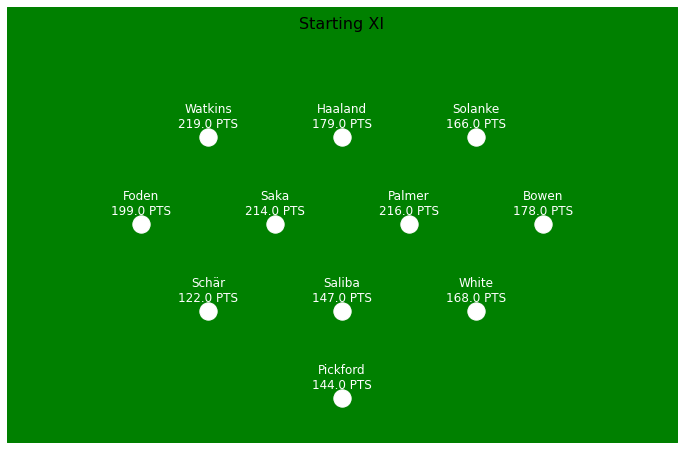

In [ ]:
import matplotlib.pyplot as plt
import random

# Assuming you have the results of the selected players in a DataFrame called 'selected_df'
# This DataFrame should have columns 'NAME', 'TEAM', 'POSITION', 'PRICE', 'POINTS', and 'POINTS_MILLION'

# Sort the selected players DataFrame by POINTS in descending order
selected_df = selected_df.sort_values(by='POINTS', ascending=False)

# Create a larger football field
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Create a green football field background
ax.fill_between([0, 1], [0, 0], [1, 1], color='green')

# Add the "Starting XI" header at the top
ax.annotate("Starting XI", (0.5, 0.95), ha='center', fontsize=16, color='black')

# Define positions for plotting and their corresponding coordinates
position_coordinates = {
    'GK': [(0.5, 0.1)],
    'DEF': [(0.3, 0.3), (0.5, 0.3), (0.7, 0.3)],
    'MID': [(0.2, 0.5), (0.4, 0.5), (0.60, 0.5), (0.8, 0.5)],
    'FWD': [(0.3, 0.7), (0.5, 0.7), (0.7, 0.7)]
}

# Create a list to keep track of used player names for each position category
used_player_names = {position: [] for position in position_coordinates.keys()}

# Keep track of the number of players placed on the field
total_players_placed = 0

# Define the number of players to place for each position category
position_limits = {
    'GK': 1,
    'DEF': 3,
    'MID': 4,
    'FWD': 3
}

# Initialize counters for each position category
position_counts = {position: 0 for position in position_coordinates.keys()}

# Iterate through the players and plot them on the field
for _, player in selected_df.iterrows():
    name = player['PLAYER']
    points = player['POINTS']
    position = player['POSITION']

    # Check if the player name has already been used in the current position category
    if name in used_player_names[position]:
        continue

    # Check if the maximum limit for the position category has been reached
    if position_counts[position] >= position_limits[position]:
        continue

    # Get the next available position for the current position category
    positions = position_coordinates.get(position, [])

    if not positions:
        continue

    # Randomly shuffle the positions within the category
    random.shuffle(positions)

    x, y = positions.pop()

    # Display the player name and points at their position
    ax.annotate(f"{name}\n{points} PTS", (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='white')

    # Plot players as white dots
    ax.scatter(x, y, color='white', s=300)

    # Mark the player name as used in the current position category
    used_player_names[position].append(name)

    # Increment the total number of players placed
    total_players_placed += 1

    # Increment the position category count
    position_counts[position] += 1

    # Break the loop if 11 players have been placed on the field
    if total_players_placed >= 11:
        break

# Show the football field with players
plt.show()


# 6. Points vs cost regression

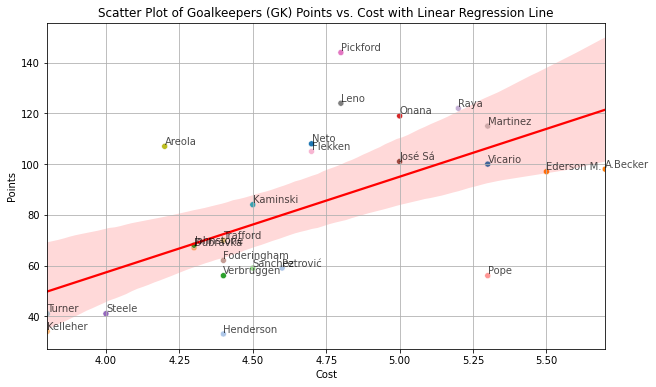

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Goalkeepers (GK)
gk_df = df[df['POSITION'] == 'GK']

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=gk_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=gk_df, scatter=False, color='red')

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Goalkeepers (GK) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in gk_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


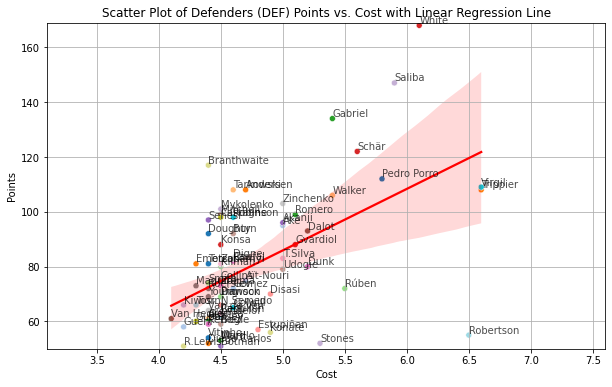

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Defenders (DEF)
def_df = df[df['POSITION'] == 'DEF']


filtered_df = def_df[def_df['POINTS'] > 50]


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=filtered_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=filtered_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
plt.xlim(filtered_df['PRICE'].min() - 1, filtered_df['PRICE'].max() + 1)
plt.ylim(filtered_df['POINTS'].min() - 1, filtered_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Defenders (DEF) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in filtered_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


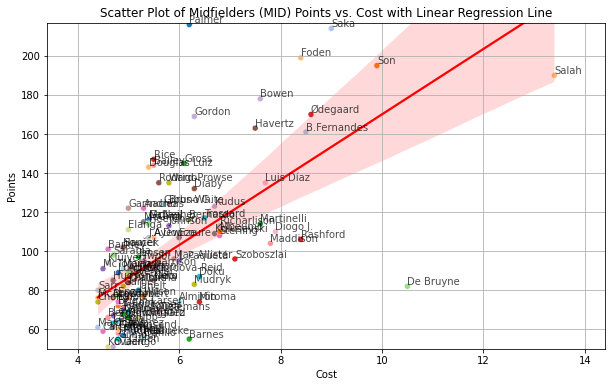

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Midfielders (MID)
mid_df = df[df['POSITION'] == 'MID']


mid_df = mid_df[mid_df['POINTS'] > 50]


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=mid_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=mid_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
plt.xlim(mid_df['PRICE'].min() - 1, mid_df['PRICE'].max() + 1)
plt.ylim(mid_df['POINTS'].min() - 1, mid_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Midfielders (MID) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in mid_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()

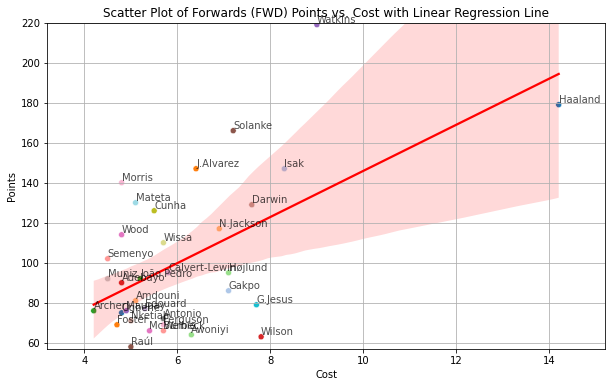

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Filter the DataFrame to select only Forwards (FWD)
fwd_df = df[df['POSITION'] == 'FWD']

fwd_df = fwd_df[fwd_df['POINTS'] > 50]


# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PRICE', y='POINTS', data=fwd_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line
sns.regplot(x='PRICE', y='POINTS', data=fwd_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
plt.xlim(fwd_df['PRICE'].min() - 1, fwd_df['PRICE'].max() + 1)
plt.ylim(fwd_df['POINTS'].min() - 1, fwd_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Forwards (FWD) Points vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in fwd_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


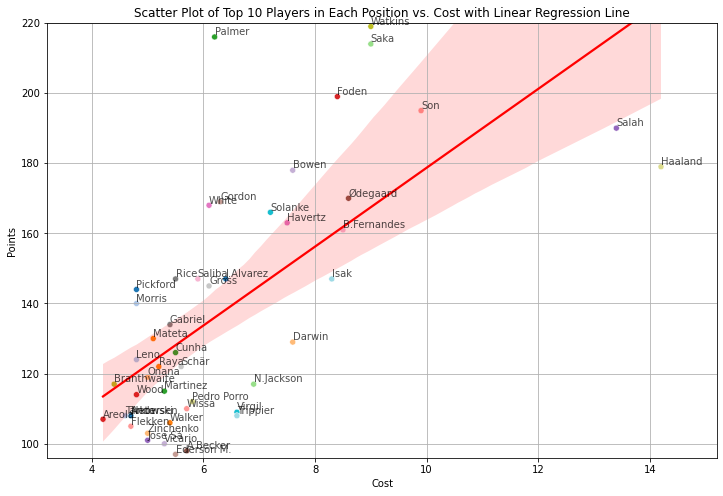

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the data in a DataFrame called 'df'
# This DataFrame should include columns 'POSITION', 'NAME', 'POINTS', and 'PRICE'

# Create an empty list to store the dataframes for each position
position_dfs = []

# Iterate through each position category
positions = ['GK', 'DEF', 'MID', 'FWD']
for position in positions:
    # Filter the DataFrame to select the top 10 players for each position by points
    position_df = df[df['POSITION'] == position].nlargest(12, 'POINTS')
    position_dfs.append(position_df)

# Concatenate the dataframes for all positions
combined_df = pd.concat(position_dfs)

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PRICE', y='POINTS', data=combined_df, hue='PLAYER', palette='tab20', legend=False)

# Fit a linear regression line for the combined data
sns.regplot(x='PRICE', y='POINTS', data=combined_df, scatter=False, color='red')

# Set the axis limits manually to ensure all players are visible
plt.xlim(combined_df['PRICE'].min() - 1, combined_df['PRICE'].max() + 1)
plt.ylim(combined_df['POINTS'].min() - 1, combined_df['POINTS'].max() + 1)

# Add labels and title
plt.xlabel('Cost')
plt.ylabel('Points')
plt.title('Scatter Plot of Top 10 Players in Each Position vs. Cost with Linear Regression Line')

# Annotate player names
for _, player in combined_df.iterrows():
    plt.annotate(player['PLAYER'], (player['PRICE'], player['POINTS']), fontsize=10, ha='left', va='bottom', alpha=0.7)

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
df = df.reset_index(drop=True)


In [ ]:
import pandas as pd

# Example player data
player_df = pd.DataFrame({'Player': ['Player1', 'Player2'],
                          'Team': ['TeamA', 'TeamB'],
                          'Points': [100, 150]})

# Example FDR data
fdr_df = pd.DataFrame({'Team': ['TeamA', 'TeamB'],
                       'FDR': [3, 2]})  # Lower FDR indicates an easier fixture

# Merge the DataFrames on the 'Team' column
merged_df = pd.merge(player_df, fdr_df, on='Team')

# Now, merged_df contains player data along with their team's FDR
print(merged_df)


    Player   Team  Points  FDR
0  Player1  TeamA     100    3
1  Player2  TeamB     150    2


In [ ]:
import pandas as pd

# Example player data
player_df = pd.DataFrame({'Player': ['Player1', 'Player2'],
                          'Team': ['TeamA', 'TeamB'],
                          'Points': [100, 150],
                          'Is_Home': [1, 0]})  # 1 for home game, 0 for away game

# Now, player_df contains information about whether each game is home or away
print(player_df)


    Player   Team  Points  Is_Home
0  Player1  TeamA     100        1
1  Player2  TeamB     150        0


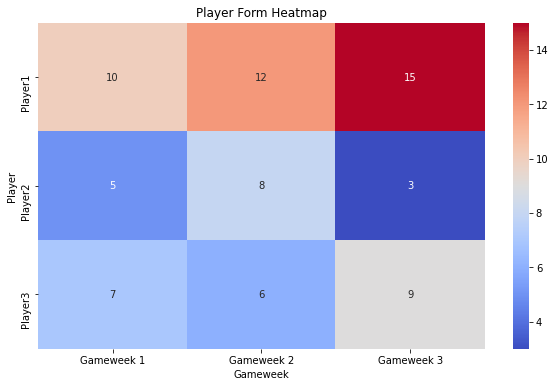

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'Player': ['Player1', 'Player2', 'Player3'],
    'Gameweek 1': [10, 5, 7],
    'Gameweek 2': [12, 8, 6],
    'Gameweek 3': [15, 3, 9],
    # Add as many gameweeks as you have data for
}
df = pd.DataFrame(data)
df = df.set_index('Player')

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm')

# Adding titles and labels
plt.title('Player Form Heatmap')
plt.xlabel('Gameweek')
plt.ylabel('Player')

# Display the heatmap
plt.show()


In [ ]:
from pyomo.environ import *

# Create a Concrete Model
model = ConcreteModel()

# Define the set of players
players = range(len(df))

# Define a binary decision variable for each player (1 if selected, 0 if not)
model.Selected = Var(players, within=Binary)

# Define the objective function to maximize total points
model.obj = Objective(expr=sum(model.Selected[i] * df.at[i, 'POINTS'] for i in players), sense=maximize)

# Define the budget constraint for total budget
total_budget = 103  # Total budget constraint in million
model.total_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.at[i, 'PRICE'] for i in players) <= total_budget)

# Define the position constraints
position_constraints = {'GK': 2, 'DEF': 5, 'MID': 5, 'FWD': 3}

for position, num_players in position_constraints.items():
    model.add_component(
        f"{position}_constraint",
        Constraint(
            expr=sum(model.Selected[i] for i in players if df.at[i, 'POSITION'] == position) == num_players
        )
    )

# Define the bench budget constraint
bench_budget_constraint = 17  # Minimum budget constraint for bench players in million
model.bench_budget_constraint = Constraint(expr=sum(model.Selected[i] * df.at[i, 'PRICE'] for i in players) >= bench_budget_constraint)

# Solve the optimization problem
solver = SolverFactory('glpk')
results = solver.solve(model)

# Extract the selected players
selected_players = [i for i in players if model.Selected[i] == 1]

# Print the selected players
print("Selected Players:")
for i in selected_players:
    print(df.at[i, 'PLAYER'], df.at[i, 'TEAM'], df.at[i, 'POSITION'], df.at[i, 'POINTS'])

# Print the total points and total cost of the selected team
total_points = sum(df.at[i, 'POINTS'] for i in selected_players)
total_cost = sum(df.at[i, 'PRICE'] for i in selected_players)
print(f"\nTotal Points: {total_points}")
print(f"Total Cost: £{total_cost} M")


ValueError: At based indexing on an non-integer index can only have non-integer indexers

In [ ]:
print(df.columns)

Index(['PLAYER', 'TEAM', 'POSITION', 'PRICE', 'POINTS', 'POINTS_MILLION',
       'POINTS_MATCH'],
      dtype='object')


In [ ]:

import pandas as pd

# Example DataFrames
df1 = pd.DataFrame({'player_name': ['Alice', 'Bob', 'Charlie'],
                    'score': [85, 78, 96]})

df2 = pd.DataFrame({'player_name': ['Alice', 'Bob', 'David'],
                    'team': ['Team A', 'Team B', 'Team C']})

# Left merging on 'player_name'
result = pd.merge(df1, df2, on='player_name', how='left')

print(result)


  player_name  score    team
0       Alice     85  Team A
1         Bob     78  Team B
2     Charlie     96     NaN
